In [0]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from imutils import paths
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from google.colab import files
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
import os
base_dir = os.getcwd()

# initialize dataset dir
src_path = os.path.join(base_dir, 'rockpaperscissors', 'rps-cv-images')

if not os.path.exists(src_path):
   !wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O rockpaperscissors.zip

--2020-05-29 02:25:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.60MB/s    in 56s     

2020-05-29 02:26:16 (5.51 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
imagePaths = list(paths.list_images(src_path))


data = []
labels = []

In [0]:

for imagePath in imagePaths:

	
	label = imagePath.split(os.path.sep)[-2]

	
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (100, 100))

	data.append(image)
	labels.append(label)

In [0]:

data = np.array(data, dtype="float") / 255.0

le = LabelEncoder()
labels = le.fit_transform(labels)

# ada 3 dataset(batu, kertas, gunting)
labels = np_utils.to_categorical(labels, 3)


(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25)

In [0]:
aug = ImageDataGenerator(rotation_range=180, fill_mode='constant')

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [15]:

BS = 8
EPOCHS = 15
opt = 'Adamax'


model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=opt,
	metrics=["accuracy"])


train_network = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS)



Epoch 1/15
205/205 [==============================] - 113s 551ms/step - loss: 1.0860 - accuracy: 0.3962 - val_loss: 1.0791 - val_accuracy: 0.3693
Epoch 2/15
205/205 [==============================] - 110s 534ms/step - loss: 0.8709 - accuracy: 0.6044 - val_loss: 0.6106 - val_accuracy: 0.7459
Epoch 3/15
205/205 [==============================] - 110s 534ms/step - loss: 0.5692 - accuracy: 0.7691 - val_loss: 0.4295 - val_accuracy: 0.8355
Epoch 4/15
205/205 [==============================] - 110s 536ms/step - loss: 0.4954 - accuracy: 0.8120 - val_loss: 0.3848 - val_accuracy: 0.8812
Epoch 5/15
205/205 [==============================] - 109s 531ms/step - loss: 0.4186 - accuracy: 0.8285 - val_loss: 0.3737 - val_accuracy: 0.8519
Epoch 6/15
205/205 [==============================] - 112s 549ms/step - loss: 0.3732 - accuracy: 0.8512 - val_loss: 0.3223 - val_accuracy: 0.8848
Epoch 7/15
205/205 [==============================] - 109s 534ms/step - loss: 0.3019 - accuracy: 0.8818 - val_loss: 0.1891 -

In [0]:
from keras.preprocessing import image

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K (1).png
0a3UtNzl5Ll3sq8K.png
Paper


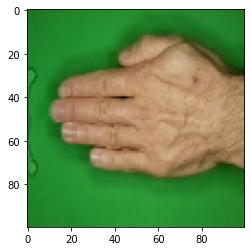

In [18]:
uploaded = files.upload()
  
for fn in uploaded.keys():
  
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100, 100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')